In [23]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec  7 11:22:40 2020

@author: mptay
"""
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score, matthews_corrcoef
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, label_binarize
import scikitplot as skplt
from sklearn.ensemble import VotingClassifier
#from sklearn import preprocessing
#from sklearn.preprocessing import OneHotEncoder

from tabula import read_pdf
import PyPDF2

In [2]:
def CategoryFinder(x):
    df = []
    if "Burger" in x:
        df.append("Beef & Pork")
    elif "burger" in x:
        df.append("Beef & Pork")
    elif "Onion" in x:
        df.append("Beef & Pork")
    elif "with" in x:
        df.append("Beef & Pork")
    elif "Style" in x:
        df.append("Beef & Pork")
    elif "Fries" in x:
        df.append("Snacks & Sides")
    elif "Shake" in x:
        df.append("Smoothies & Shakes")
    elif "Coffee" in x:
        df.append("Coffee & Tea")
    else:
        df.append("Beverages")
    return(df)

def CategoryFinderRR(x):
    df = []
    if "burger" in x.lower():
        df.append("Beef & Pork")
    elif "caes" in x.lower():
        df.append("Salads")
    elif "burger" in x.lower():
        df.append("Beef & Pork")
    elif "patty" in x.lower():
        df.append("Beef & Pork")
    elif "ring" in x.lower():
        df.append("Snacks & Sides")
    elif "sticks" in x.lower():
        df.append("Snacks & Sides")
    elif "onion" in x.lower():
        df.append("Beef & Pork")
    elif "bites" in x.lower():
        df.append("Snacks & Sides")
    elif "style" in x.lower():
        df.append("Beef & Pork")
    elif "frie" in x.lower():
        df.append("Snacks & Sides")
    elif "shake" in x.lower():
        df.append("Smoothies & Shakes")
    elif "cookie" in x.lower():
        df.append("Smoothies & Shakes")
    elif "veggie" in x.lower():
        df.append("Beef & Pork")
    elif "robin" in x.lower():
        df.append("Beef & Pork")
    elif "burnin" in x.lower():
        df.append("Beef & Pork")
    elif "bacon" in x.lower():
        df.append("Beef & Pork")
    elif "wings" in x.lower():
        df.append("Chicken & Fish")
    elif "coffee" in x.lower():
        df.append("Coffee & Tea")
    elif "salad" in x.lower():
        df.append("Salads")
    elif "dress" in x.lower():
        df.append("Salads")
        
    elif "simple" in x.lower():
        df.append("Beef & Pork")
    elif "shroom" in x.lower():
        df.append("Beef & Pork")
    elif "bbq" in x.lower():
        df.append("Beef & Pork")
    elif "&" in x.lower():
        df.append("Beef & Pork")
    elif "cheese" in x.lower():
        df.append("Beef & Pork")
        
    elif "banzai" in x.lower():
        df.append("Beef & Pork")
        
    else:
        df.append("Beverages")
    return(df)

In [3]:
RedRobin = read_pdf("RedRobin.pdf",pages='all',multiple_tables = True, pandas_options={'header': None})

RedRobin_df = RedRobin[1].append( [RedRobin[13], RedRobin[12], RedRobin[8], RedRobin[6], RedRobin[2], RedRobin[24], RedRobin[23], RedRobin[14] ] )
RedRobin_df = RedRobin_df.reset_index()

RedRobin_df = RedRobin_df.drop('index',1)
RedRobin_df = RedRobin_df.drop_duplicates(subset=[0],keep='first')
RedRobin_df = RedRobin_df.drop([12,17],0)

RedRobin_df = RedRobin_df.reset_index()
RedRobin_df = RedRobin_df.drop('index',1)

RedRobin_df.iloc[64:71,1:13] = RedRobin_df.iloc[64:71,1:13].shift(1, axis = 1)
RedRobin_df.iloc[71:73,:] = RedRobin_df.iloc[71:73,:].shift(2, axis = 1)

RedRobin_df.iloc[16:37,6] = RedRobin_df.iloc[16:37,5]
RedRobin_df.iloc[16:37,5] = RedRobin_df.iloc[16:37,4]

temp_string = RedRobin_df.iloc[16:37,3]
temp_string = temp_string.str.split(" ", expand=True)
RedRobin_df.iloc[16:37,3] = temp_string.iloc[:,0]
RedRobin_df.iloc[16:37,4] = temp_string.iloc[:,1]

RedRobin_df.iloc[37:44,9] = RedRobin_df.iloc[37:44,8]
RedRobin_df.iloc[37:44,8] = RedRobin_df.iloc[37:44,7]
RedRobin_df.iloc[37:44,7] = RedRobin_df.iloc[37:44,6]
RedRobin_df.iloc[37:44,6] = RedRobin_df.iloc[37:44,5]
RedRobin_df.iloc[37:44,5] = RedRobin_df.iloc[37:44,4]
RedRobin_df.iloc[37:44,4] = RedRobin_df.iloc[37:44,3]

temp_string = RedRobin_df.iloc[37:44,2]
temp_string = temp_string.str.split(" ", expand=True)
RedRobin_df.iloc[37:44,2] = temp_string.iloc[:,0]
RedRobin_df.iloc[37:44,3] = temp_string.iloc[:,1]
RedRobin_df.insert(0,"Category", "TBD")
RedRobin_df.insert(0,"Resturant", "RedRobin")
RedRobin_df.columns = ["Resturant", "Category", "Item", "ServingSize", "Calories","CaloriesFromFat","TotalFat","SaturatedFat","TransFat","Cholesterol","Sodium","Carbohydrates","DietaryFiber","Sugar","Protien"]
RedRobin_df = RedRobin_df.drop([71,72],0)

test_df = RedRobin_df['Item'].apply(lambda x: CategoryFinderRR(x))
test_df = test_df.apply(pd.Series).stack().reset_index(drop = True) 
RedRobin_df['Category'] = test_df

In [4]:
InNOut = read_pdf("InNOut.pdf",pages='all',multiple_tables = True, pandas_options={'header': None})
InNOut_df = InNOut[0]
InNOut_df = InNOut_df.drop(23,1)
InNOut_df = InNOut_df.dropna(0)
InNOut_df = InNOut_df.rename(columns={0:"Item",1:"ServingSize",2:"Calories",3:"CaloriesFromFat",4:"TotalFat",5:"TF%OfDailyValue",6:"SaturatedFat",7:"SF%OfDailyValue",8:"TransFat",9:"Cholesterol",10:"Chol%OfDailyValue",11:"Sodium",12:"S%OfDailyValue",13:"Carbohydrates",14:"Carb%OfDailyValue",15:"DietaryFiber",16:"Fiber%OfDailyValue",17:"Sugar",18:"Protien",19:"%VitaminA",20:"%VitaminC",21:"%Calcium",22:"%Iron"})
InNOut_df.insert(0,"Category", "TBD")
InNOut_df.insert(0,"Resturant", "InNOut")

test_df = InNOut_df['Item'].apply(lambda x: CategoryFinder(x))
test_df = test_df.apply(pd.Series).stack().reset_index(drop = True) 

InNOut_df = InNOut_df.reset_index()
InNOut_df = InNOut_df.drop('index',1)
InNOut_df['Category'] = test_df

In [5]:
McDonalds = pd.read_csv("McDonalds.csv")
McDonalds.insert(0,"Resturant", "McDonalds")
McDonalds.columns = ["Resturant","Category","Item","ServingSize","Calories","CaloriesFromFat","TotalFat","TF%OfDailyValue","SaturatedFat","SF%OfDailyValue","TransFat","Cholesterol","Chol%OfDailyValue","Sodium","S%OfDailyValue","Carbohydrates","Carb%OfDailyValue","DietaryFiber","Fiber%OfDailyValue","Sugar","Protien","%VitaminA","%VitaminC","%Calcium","%Iron"]

In [6]:
Total_df = McDonalds.append(InNOut_df)
Total_df = Total_df.append(RedRobin_df)
Total_df = Total_df.reset_index()
Total_df = Total_df.drop('index',1)

Total_df.iloc[:,4:26] = Total_df.iloc[:,4:26].apply(pd.to_numeric)
Final_df = Total_df
Final_df['Category'] = Total_df['Category'].astype('category')
Final_df['Item'] = Total_df['Item'].astype('category')
Final_df['ServingSize'] = Total_df['ServingSize'].astype('category')
Final_df['Resturant'] = Total_df['Resturant'].astype('category')

In [7]:
dummy_df = pd.get_dummies(Final_df, columns=["Category","Resturant"])
dummy_df.to_csv("SuperSizeMe.csv")

#MODEL STOOF

imputer = KNNImputer(n_neighbors=2)

#X = dummy_df.iloc[:,3:36]
#y = dummy_df['Calories']

Final_df.iloc[:,4:25] = imputer.fit_transform(Final_df.iloc[:,4:25])
Final_df = pd.get_dummies(Final_df, columns=["Resturant"])

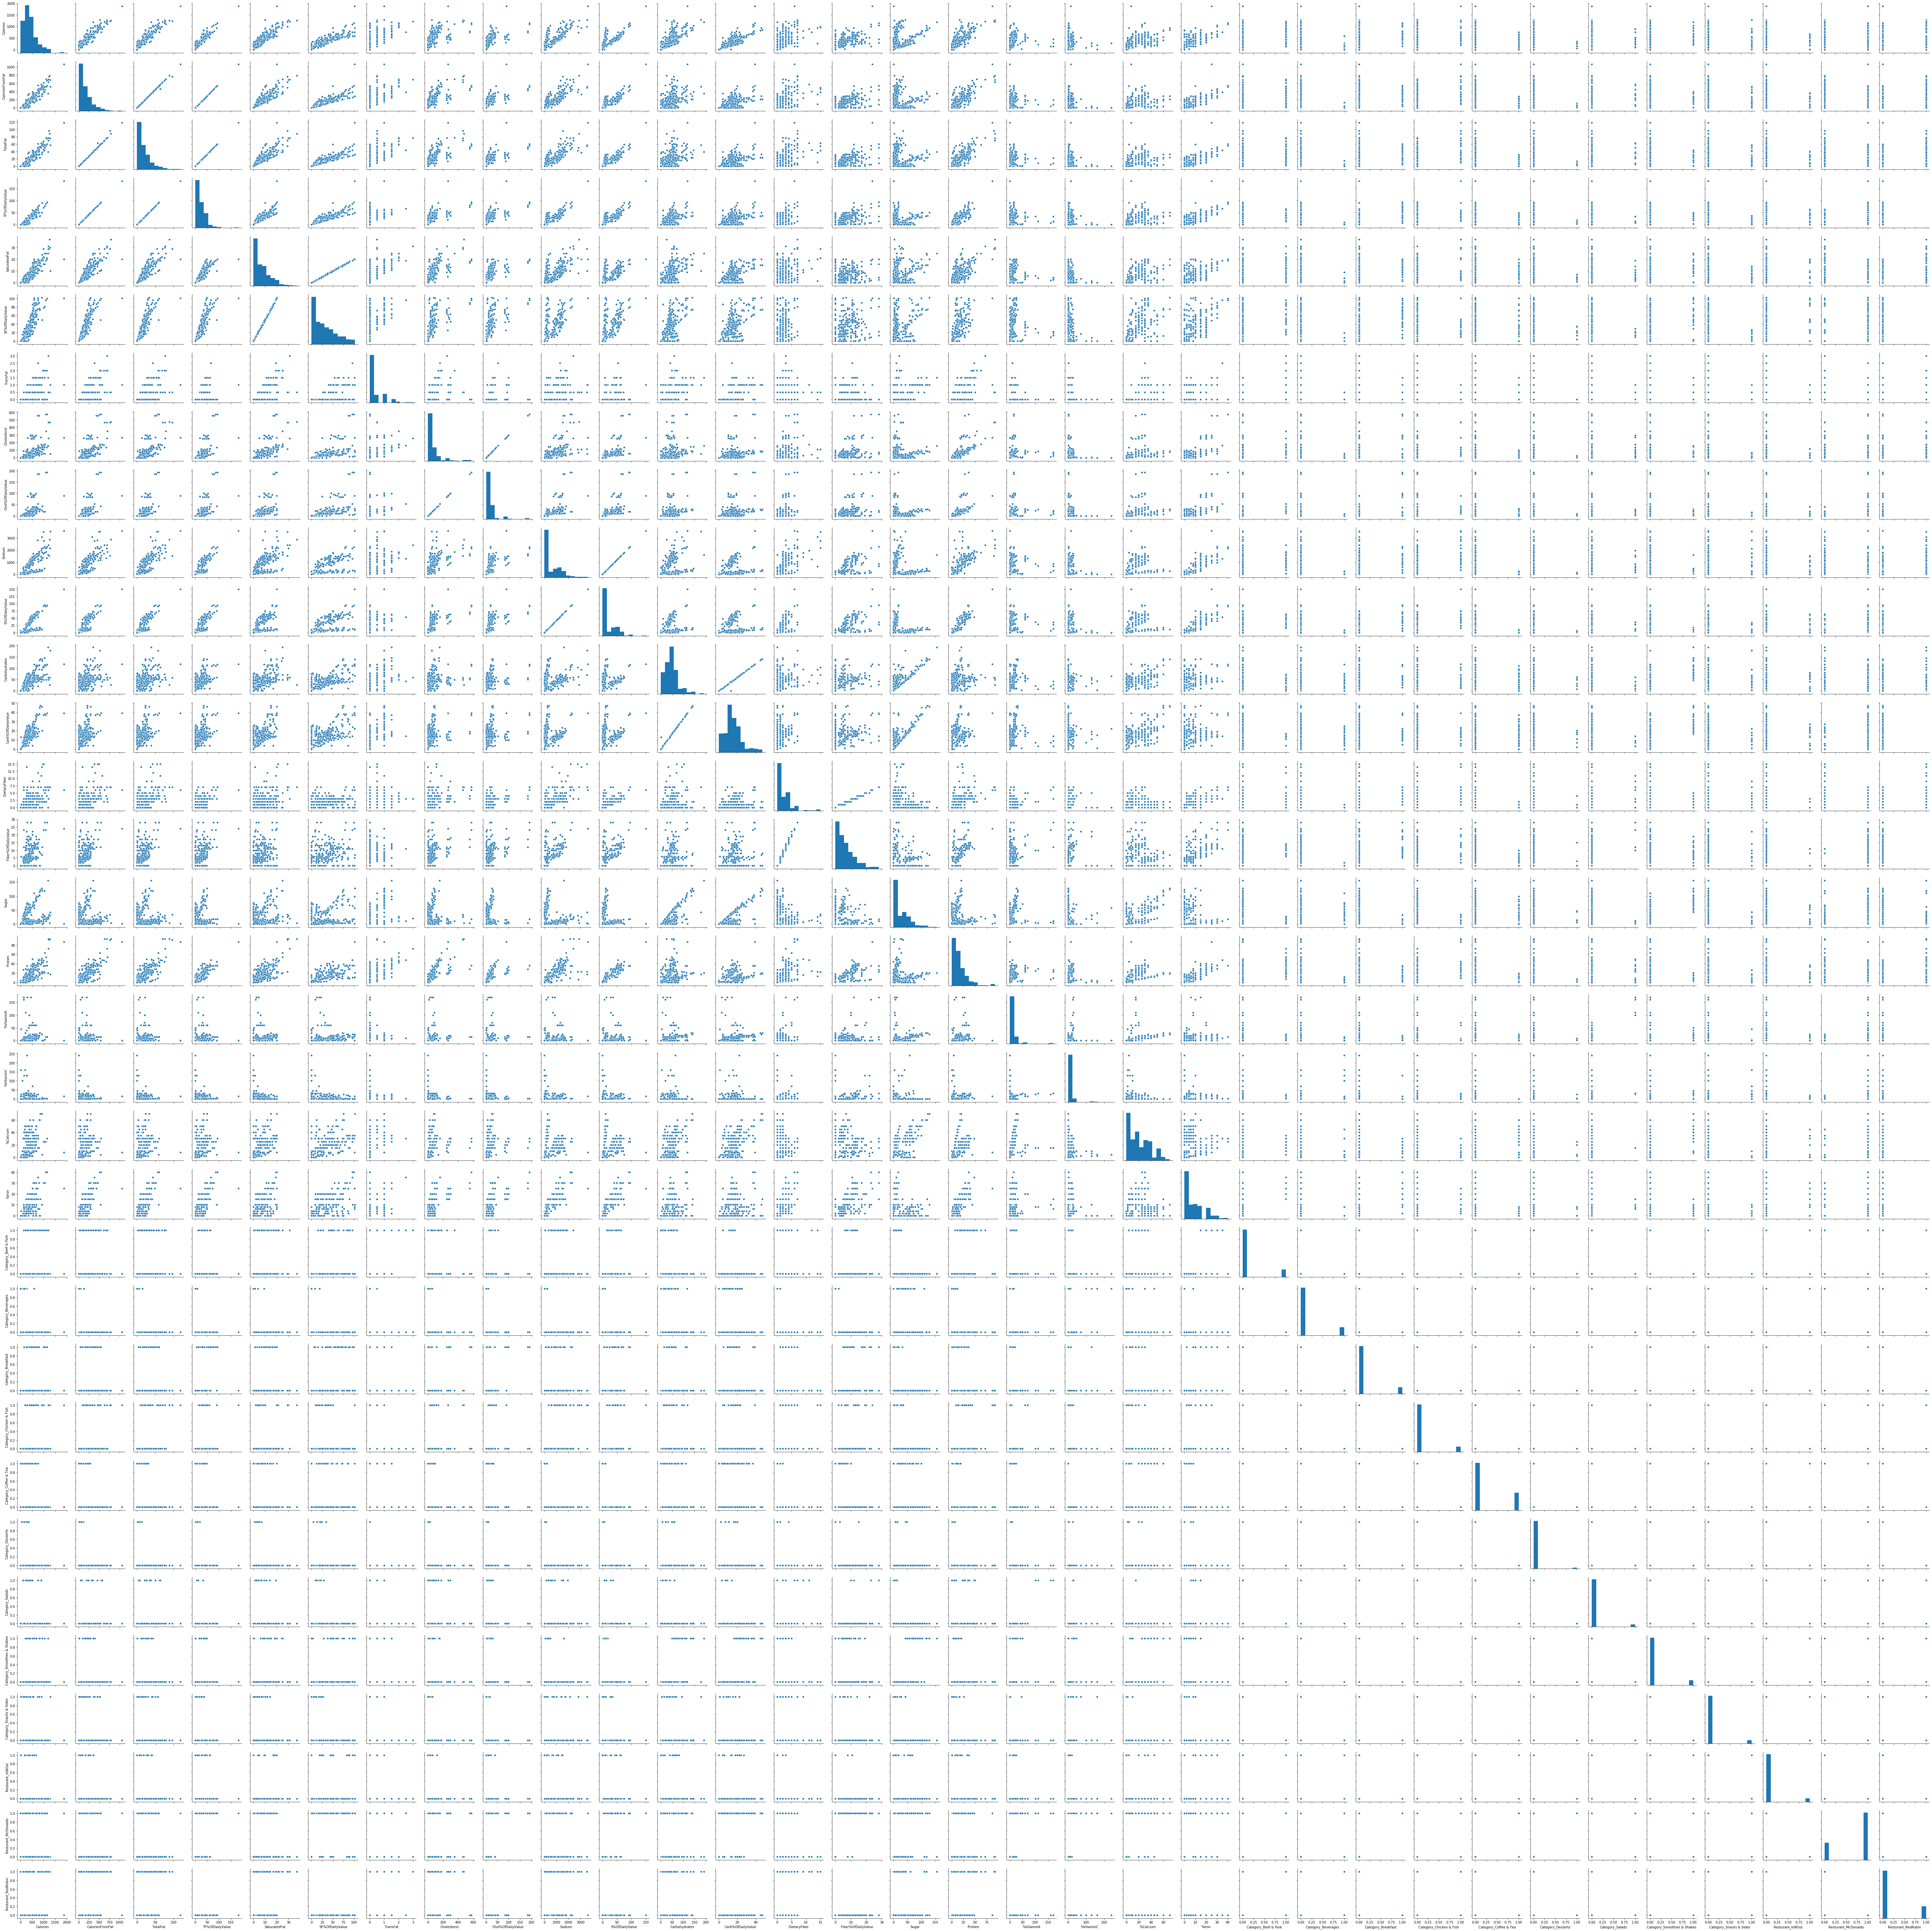

In [8]:
sns.pairplot(dummy_df)

In [9]:
X = Final_df.iloc[:,np.r_[3:27]]
y = Final_df['Category']

le = LabelEncoder() 
y = le.fit_transform(Final_df['Category'])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
yhat = nb.predict(X_test)
print()
print("Naive Bayes")
print("Accuracy Score :",accuracy_score(y_test, yhat))
print("F1 Score :",f1_score(y_test, yhat, average='micro'))
print("Precision Score : ",precision_score(y_test, yhat, pos_label='positive', average='micro'))
print("Recall Score : ",recall_score(y_test, yhat, pos_label='positive',average='micro'))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=713)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
yhat_clf = dt.predict(X_test)

print()
print("Decision Tree")

print("Accuracy Score :",accuracy_score(y_test, yhat_clf))
print("F1 Score :",f1_score(y_test, yhat_clf, average='micro'))
print("Precision Score : ",precision_score(y_test, yhat_clf, pos_label='positive', average='micro'))
print("Recall Score : ",recall_score(y_test, yhat_clf, pos_label='positive',average='micro'))


#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
yhat_rf = rf.predict(X_test)

print()
print("Random Forest")
print("Accuracy Score :",accuracy_score(y_test, yhat_rf))
print("F1 Score :",f1_score(y_test, yhat_rf, average='micro'))
print("Precision Score : ",precision_score(y_test, yhat_rf, average='micro'))
print("Recall Score : ",recall_score(y_test, yhat_rf,average='micro'))

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
yhat_gb = gb.predict(X_test)

print()
print("Gradient Boosting")
print("Accuracy Score :",accuracy_score(y_test, yhat_gb))
print("F1 Score :",f1_score(y_test, yhat_gb, average='micro'))
print("Precision Score : ",precision_score(y_test, yhat_gb, average='micro'))
print("Recall Score : ",recall_score(y_test, yhat_gb,average='micro'))

#Linear Regression
from sklearn.linear_model import LogisticRegression
print()
print("Fitting Logistic Regression")
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

yhat_lr = lr.predict(X_test)

print("Accuracy Score :",accuracy_score(y_test, yhat_lr))
print("F1 Score :",f1_score(y_test, yhat_lr, average='micro'))
print("Precision Score : ",precision_score(y_test, yhat_lr, average='micro'))
print("Recall Score : ",recall_score(y_test, yhat_lr,average='micro'))


#KNN
print()
print("Fitting KNN")
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)

yhat_knn = knn.predict(X_test)

print("Accuracy Score :",accuracy_score(y_test, yhat_knn))
print("F1 Score :", f1_score(y_test, yhat_knn, average='micro'))
print("Precision Score : ",precision_score(y_test, yhat_knn, average='micro'))
print("Recall Score : ",recall_score(y_test, yhat_knn,average='micro'))


#SVC
from sklearn.svm import SVC
print()
print("Fitting SVC")
svc = SVC(kernel='linear',probability=True)
svc.fit(X_train, y_train)

yhat_svc = svc.predict(X_test)

print("Accuracy Score :",accuracy_score(y_test, yhat_svc))
print("F1 Score :",f1_score(y_test, yhat_svc, average='micro'))
print("Precision Score : ",precision_score(y_test, yhat_svc, average='micro'))
print("Recall Score : ",recall_score(y_test, yhat_svc ,average='micro'))


Decision Tree
Accuracy Score : 0.704225352112676
F1 Score : 0.704225352112676
Precision Score :  0.704225352112676
Recall Score :  0.704225352112676


C:\Users\mptay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)



Random Forest
Accuracy Score : 0.7535211267605634
F1 Score : 0.7535211267605635
Precision Score :  0.7535211267605634
Recall Score :  0.7535211267605634

Gradient Boosting
Accuracy Score : 0.7464788732394366
F1 Score : 0.7464788732394367
Precision Score :  0.7464788732394366
Recall Score :  0.7464788732394366

Fitting Logistic Regression
Accuracy Score : 0.7816901408450704
F1 Score : 0.7816901408450704
Precision Score :  0.7816901408450704
Recall Score :  0.7816901408450704

Fitting KNN
Accuracy Score : 0.7816901408450704
F1 Score : 0.7816901408450704
Precision Score :  0.7816901408450704
Recall Score :  0.7816901408450704

Fitting SVC
Accuracy Score : 0.8169014084507042
F1 Score : 0.8169014084507042
Precision Score :  0.8169014084507042
Recall Score :  0.8169014084507042


In [45]:
cm = confusion_matrix(y_test, yhat_svc)
print(cm)

[[11  0  0  0  0  0  1  0  2]
 [ 0 16  0  0  2  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  2]
 [ 0  0  1 14  0  0  0  0  1]
 [ 0  6  0  0 35  0  0  1  0]
 [ 0  1  0  0  1  0  0  0  0]
 [ 2  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  3  0  0  9  0]
 [ 1  0  2  0  0  0  0  0  4]]


In [43]:
print("Fitting final Voting Classifier")
vc = VotingClassifier(estimators=[('svc', svc), ('lr', lr), ('rf', rf)], voting='soft')
vc.fit(X_train, y_train)


Fitting final Voting Classifier


VotingClassifier(estimators=[('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercep...
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     m

In [44]:
predictions = vc.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)

print( "F1: ", f1_score(y_test, predictions, average='micro'))
print( "Recall: ", recall_score(y_test, predictions, average='micro'))
print( "Accuracy: ", accuracy_score(y_test, predictions))
print( "Matthews Correlation Coefficient", matthews_corrcoef(y_test, predictions))

[[12  0  0  0  0  0  1  0  1]
 [ 0 15  0  0  3  0  0  0  0]
 [ 0  0 20  1  0  0  0  0  2]
 [ 0  0  0 14  0  0  0  0  2]
 [ 0  5  0  0 36  0  0  1  0]
 [ 0  0  0  0  2  0  0  0  0]
 [ 3  0  0  2  0  0  3  0  0]
 [ 0  0  0  0  3  0  0  9  0]
 [ 1  0  1  0  0  0  0  0  5]]
F1:  0.8028169014084506
Recall:  0.8028169014084507
Accuracy:  0.8028169014084507
Matthews Correlation Coefficient 0.7638521768593677


ValueError: Found input variables with inconsistent numbers of samples: [142, 2]

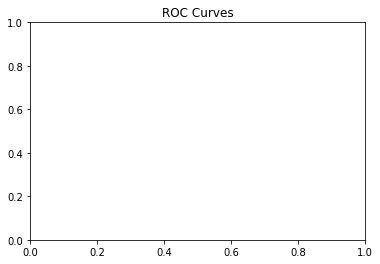